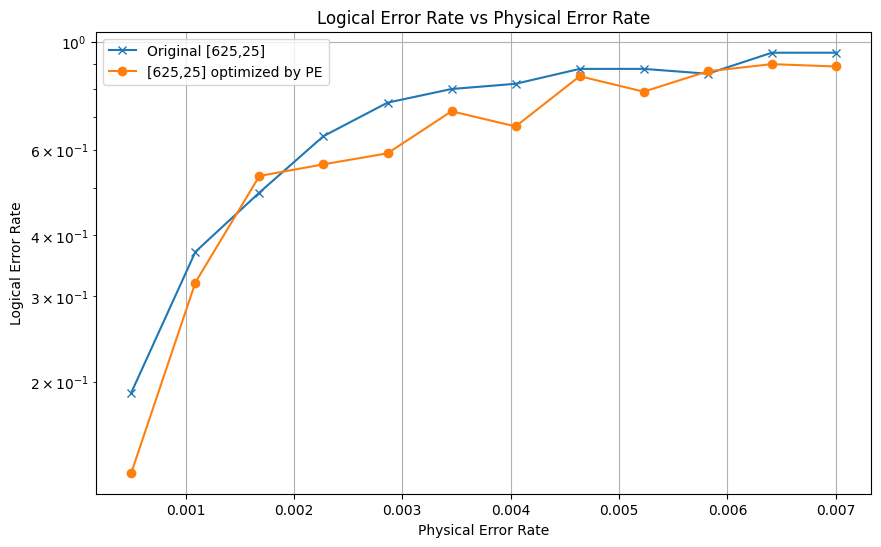

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

original_data = {}
PE_data = {}

# Load the original state data
with h5py.File('../results/original_state.hdf5', 'r') as f:
    for code, grp in f.items():
        original_data[code] = {}
        original_data[code]['physical_error_rates'] = grp['physical_error_rates'][()].copy()
        original_data[code]['logical_error_rates'] = grp['logical_error_rates'][()].copy()
        original_data[code]['states'] = grp['best_state'][()].copy()

# Load the best states from Plain Exploration and their corresponding error rates
with h5py.File('../results/best_from_exploration_3.hdf5', 'r') as f:
    for code, grp in f.items():
        PE_data[code] = {}
        PE_data[code]['physical_error_rates'] = grp['physical_error_rates'][()].copy()
        PE_data[code]['logical_error_rates'] = grp['logical_error_rates'][()].copy()
        PE_data[code]['states'] = grp['best_state'][()].copy()

plt.figure(figsize=(10, 6))
for code, data in original_data.items():
    plt.plot(data['physical_error_rates'], data['logical_error_rates'], marker='x', label=f'Original {code}')

for code, data in PE_data.items():
    plt.plot(data['physical_error_rates'], data['logical_error_rates'], marker='o', label=f'{code} optimized by PE')

plt.xlabel('Physical Error Rate')
plt.ylabel('Logical Error Rate')
plt.yscale('log')
plt.title('Logical Error Rate vs Physical Error Rate')
plt.legend()
plt.grid()
plt.show()


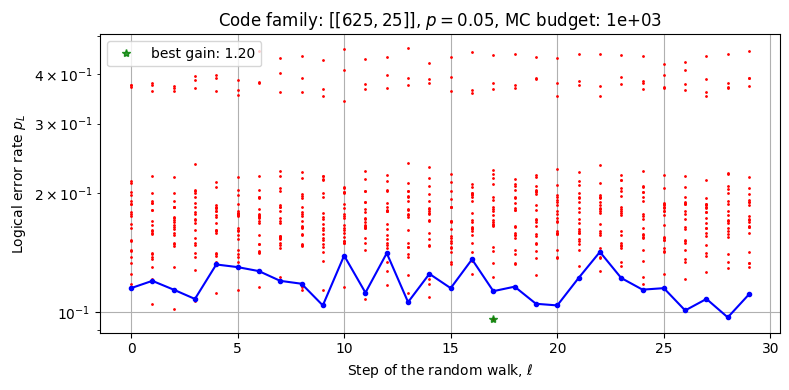

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# codes = ['[625,25]', '[1225,65]', '[1600,64]', '[2025,81]']
codes = ['[625,25]']
# physical_error_rates = ['0.05', '8/32', '9/32', '12/32']
physical_error_rates = ['0.05']
fn_data = {}

with h5py.File('../../random_exploration.hdf5', 'r') as f:
    for code, grp in f.items():
        fn_data[code] = {}
        fn_data[code]['MC_budget'] = grp.attrs['MC_budget']
        fn_data[code]['states'] = grp['states'][()].copy()
        fn_data[code]['logical_error_rates'] = grp['logical_error_rates'][()].copy()

# exploration_params = {code: par for code, par in zip(codes, [(24, 120), (15, 70), (12, 40), (8, 30)])}
exploration_params = {code: par for code, par in zip(codes, [(24, 30)])}

for code in fn_data:
    fn_data[code]['logical_error_rates'] = fn_data[code]['logical_error_rates'].reshape(exploration_params[code])

# fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(16,4), sharey=True)
fig, (ax0) = plt.subplots(1, 1, figsize=(8, 4), sharey=True)

# for code, ax, physical_error_rate in zip(codes, [ax0, ax1, ax2, ax3], physical_error_rates):
for code, ax, physical_error_rate in zip(codes, [ax0], physical_error_rates):
    data_0 = fn_data[code]
    ax.set_title(f'Code family: $[{code}]$, $p = {physical_error_rate}$, MC budget: {data_0["MC_budget"]:.0e}')
    x = np.arange(len(data_0['logical_error_rates'].T))
    ax.semilogy(x, data_0['logical_error_rates'][1:].T, 'r.', markersize=2)
    ax.semilogy(x, data_0['logical_error_rates'][0].T, 'b.-')
    gain = data_0['logical_error_rates'][0][0]/data_0['logical_error_rates'].min()
    ax.semilogy(data_0['logical_error_rates'].min(axis=0).argmin(), data_0['logical_error_rates'].min(), 'g*', alpha=0.8, 
              linewidth=1, label=f'best gain: {gain:.2f}')
    # ax.vlines(x, data_0['logical_error_rates'][0].T - 1.96*data_0['std'][0]/1e2, 
    #           data_0['logical_error_rates'][0].T + 1.96*data_0['std'][0]/1e2, alpha=0.8, color='cyan', linewidth=1)
    ax.set_xlabel('Step of the random walk, $\\ell$')
    ax.set_ylabel('Logical error rate $p_L$')
    ax.grid('minor')
    ax.legend()
# plt.xlim([0, 19])
# plt.ylim([8e-3, 7e-2])
plt.tight_layout()

# plt.savefig('../img/exploration.pdf')

plt.show()